Notebook to check the Over preprocessed scans as well as to check registration

In [1]:
from nilearn import image as nimg
from nilearn import plotting as nplot
from nilearn import image
from bids.layout import BIDSLayout
import decouple 

In [2]:
config = decouple.AutoConfig(' ')
fmriprep_location = config('eft_fmriprep_dir_2')
layout = BIDSLayout(fmriprep_location, validate=False)

In [18]:
participant = 'B2016'

In [19]:
T1w = layout.get(subject=participant, datatype='anat', desc='preproc', space='MNI152NLin2009cAsym', extension='nii.gz', return_type='file')
T2w = layout.get(subject=participant, datatype='func', desc='preproc', space='MNI152NLin2009cAsym', extension='nii.gz', return_type='file')
bm = layout.get(subject=participant, datatype='func', desc='brain', suffix='mask', space='MNI152NLin2009cAsym', extension='nii.gz', return_type='file')
anat = nimg.load_img(T1w)
func = nimg.load_img(T2w)
brainmask = nimg.load_img(bm)
func_mean = image.mean_img(func)
anat_mean = image.mean_img(anat)


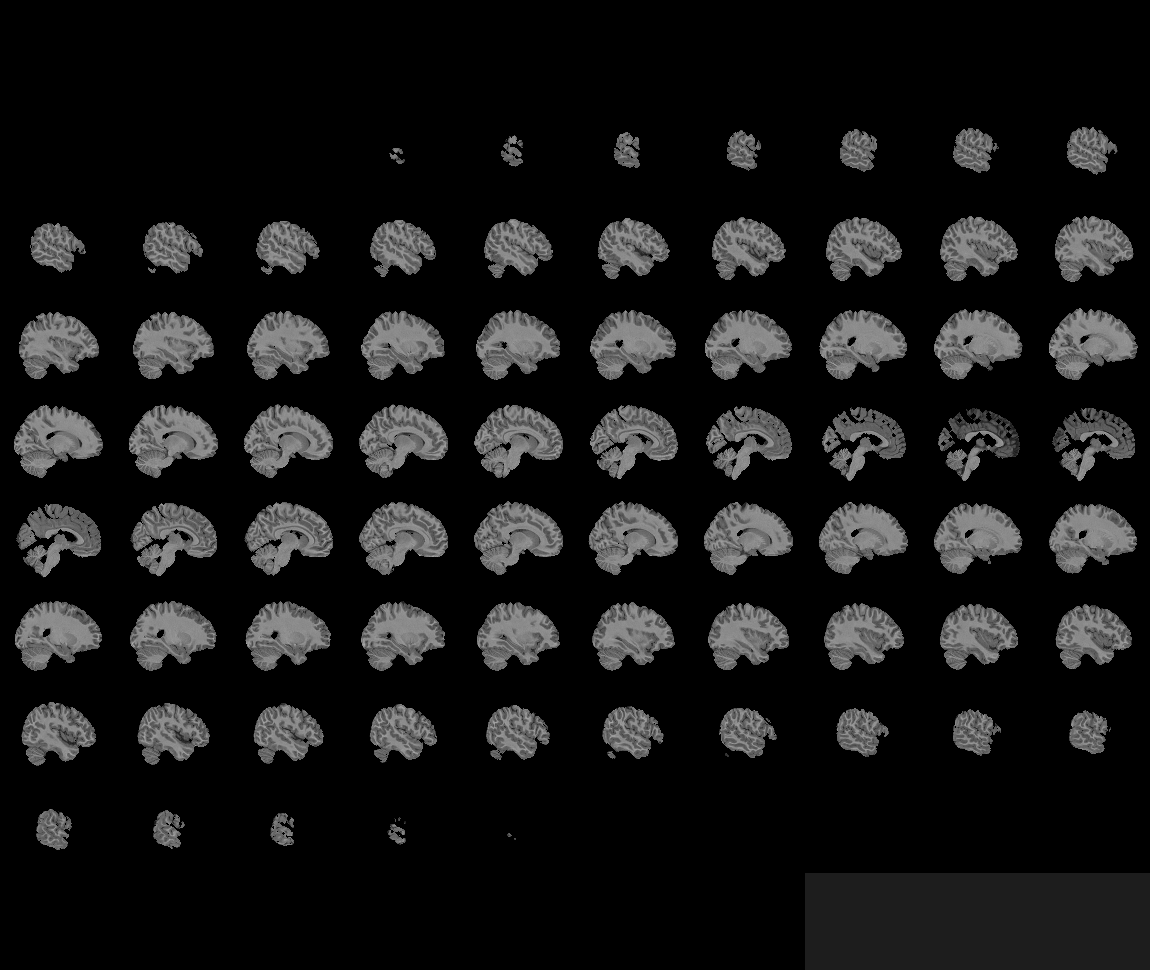
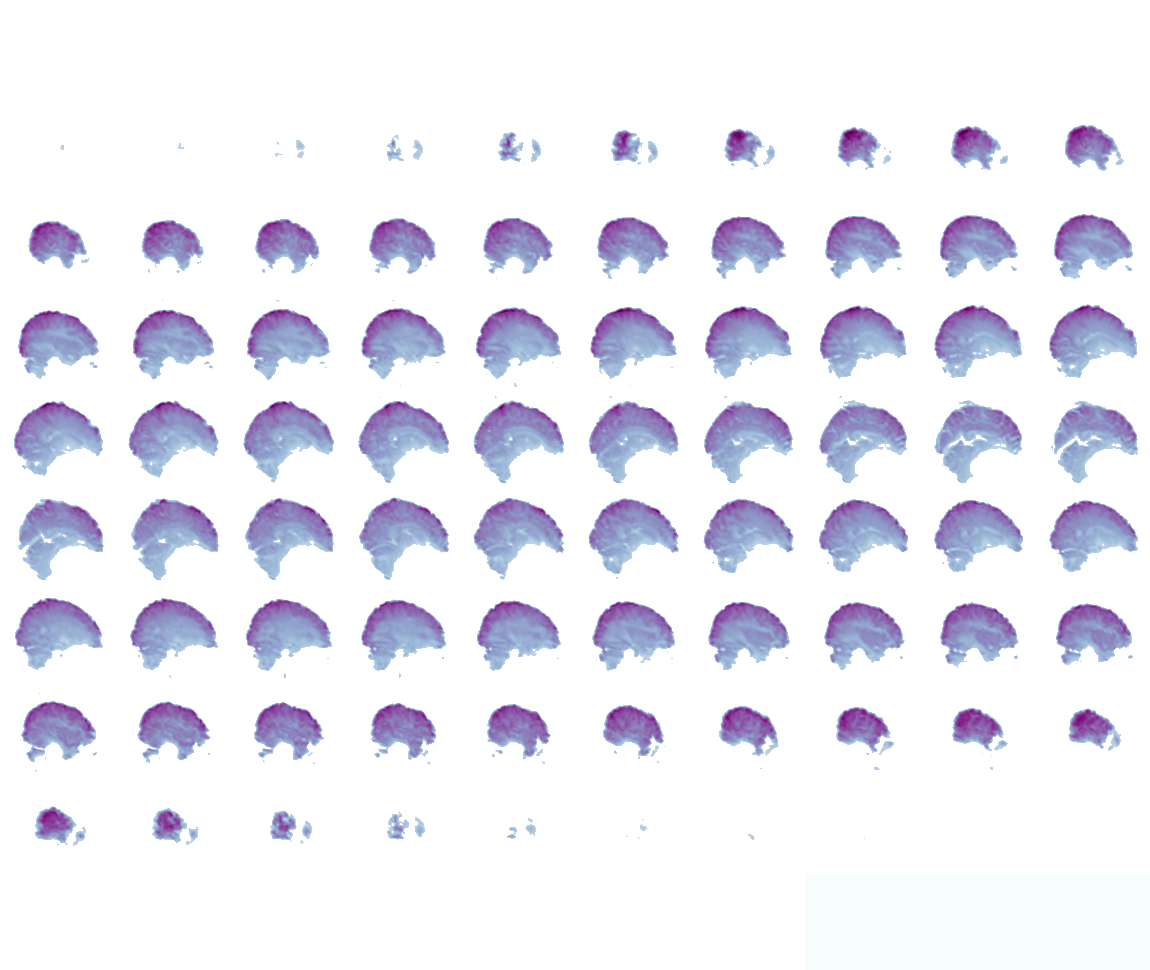

In [23]:
nplot.view_img(func_mean, bg_img=anat, cmap='BuPu', symmetric_cmap=False, opacity=0.7, threshold="auto", cut_coords=(0, 0, 0))          


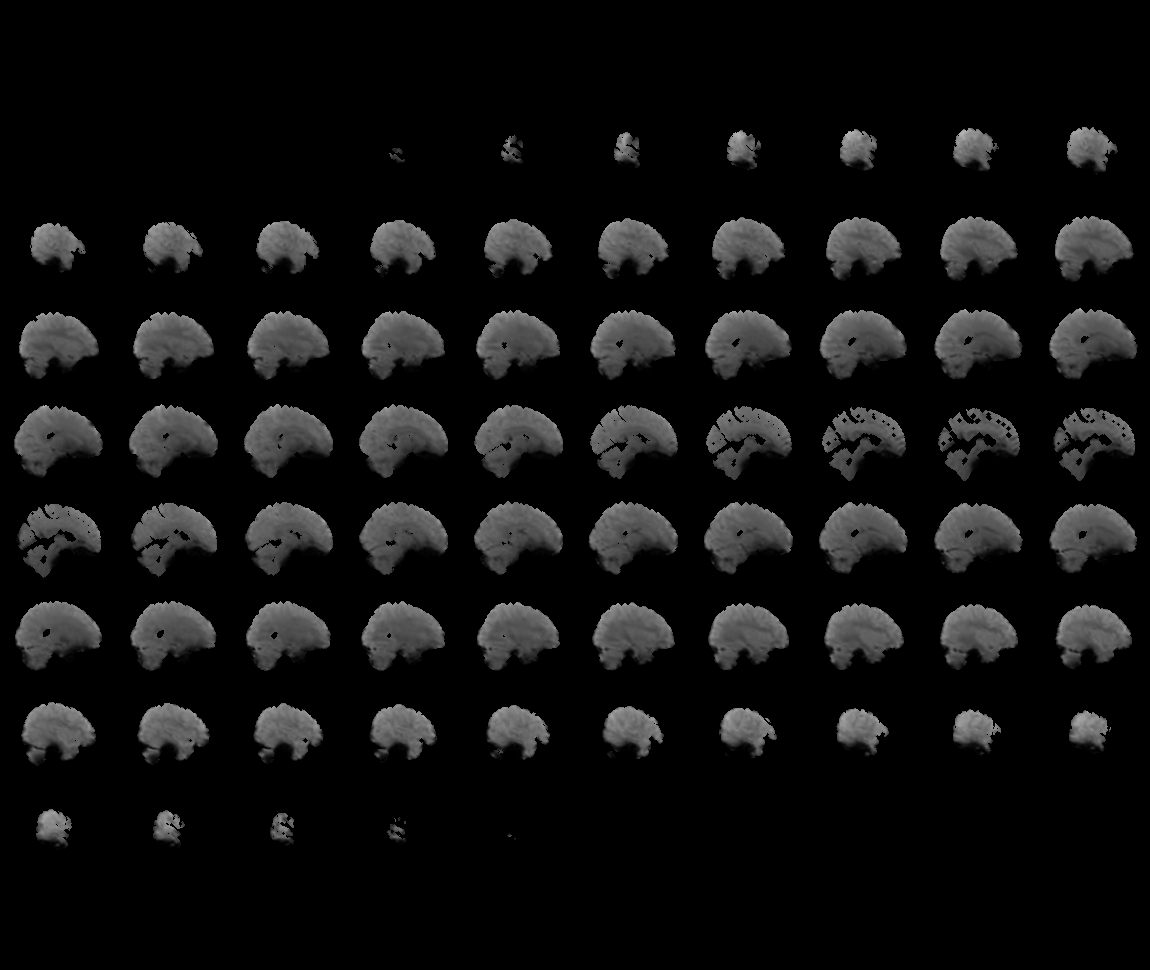
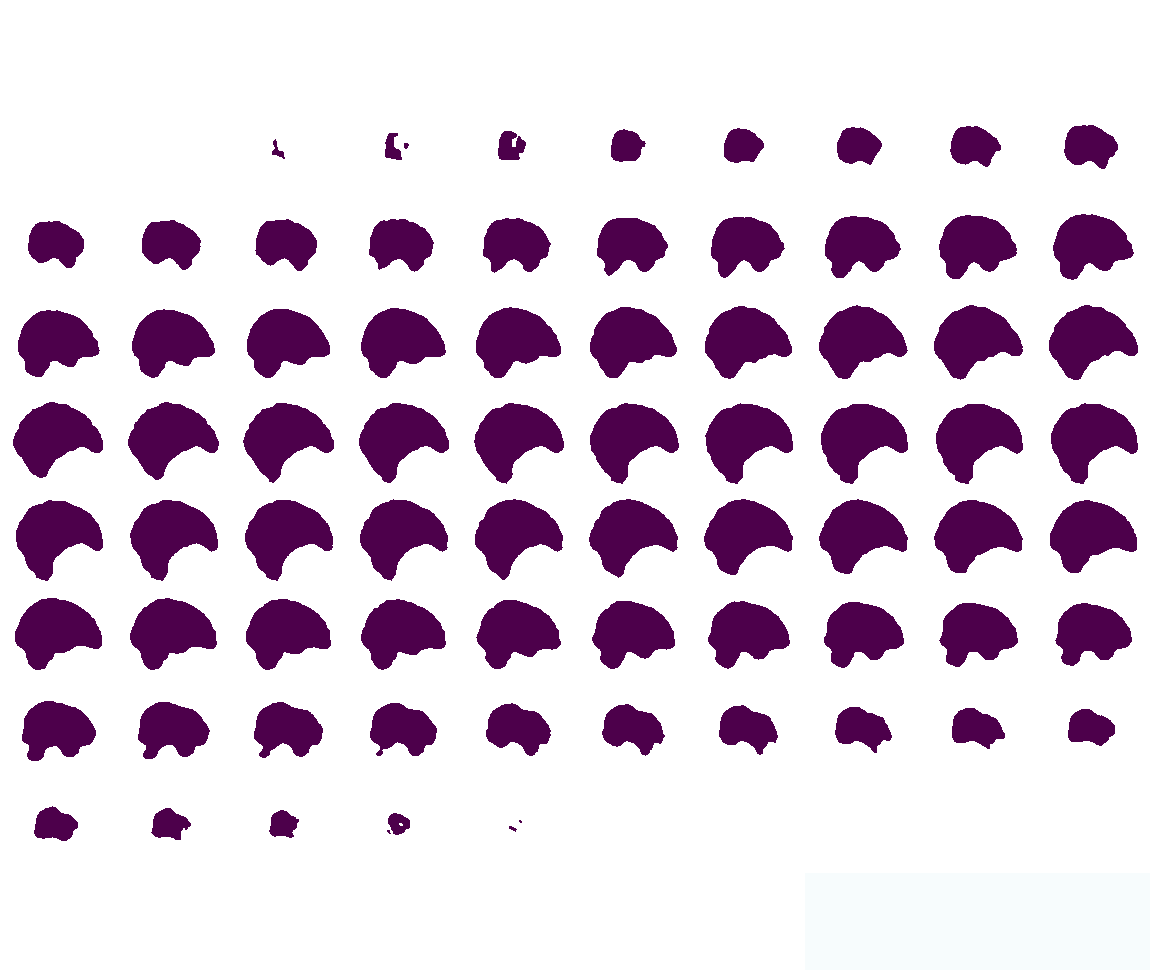

In [21]:
nplot.view_img(brainmask, bg_img=func_mean, cmap='BuPu', symmetric_cmap=False, opacity=0.7, threshold="auto", cut_coords=(0, 0, 0))   

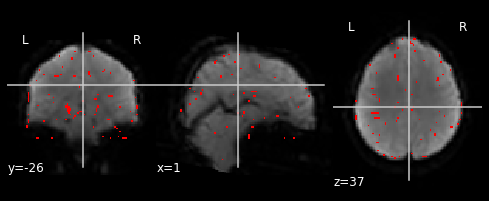

In [22]:
display = nplot.plot_anat(func_mean)
display.add_edges(anat_mean)